<a href="https://colab.research.google.com/github/NAizdabezt/sgu_data_analysit/blob/main/da06_hoi_quy_california_TuNhatAnh_3122410012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÀI 6 — DỰ ĐOÁN GIÁ NHÀ CALIFORNIA (California Housing)
- **Mục tiêu:** xây dựng pipeline hồi quy đầy đủ — từ EDA, tiền xử lý, mô hình hóa,
đánh giá, tối ưu tham số, đến demo dự đoán dữ liệu mới.
- **Biến mục tiêu:** `MedHouseVal` (giá nhà trung bình, đơn vị 100k USD).

## I. TẢI DỮ LIỆU & GIỚI THIỆU

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

california = fetch_california_housing(as_frame=True)
df = california.frame.copy()   # DataFrame gồm 8 biến + target MedHouseVal
df.shape, df.columns

((20640, 9),
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'MedHouseVal'],
       dtype='object'))

| Cột             | Ý nghĩa                                                         |
| --------------- | --------------------------------------------------------------- |
| **MedInc**      | Thu nhập trung bình của hộ gia đình trong khu vực (x10,000 USD) |
| **HouseAge**    | Tuổi trung bình của các ngôi nhà trong khu vực                  |
| **AveRooms**    | Số phòng trung bình mỗi nhà                                     |
| **AveBedrms**   | Số phòng ngủ trung bình mỗi nhà                                 |
| **Population**  | Dân số khu vực                                                  |
| **AveOccup**    | Số người trung bình mỗi hộ                                      |
| **Latitude**    | Vĩ độ                                                           |
| **Longitude**   | Kinh độ                                                         |
| **MedHouseVal** | Giá nhà trung bình (đơn vị 100,000 USD – cột mục tiêu `y`)      |


In [ ]:
# Hiển thị 5 dòng đầu và thống kê
display(df.head())
display(df.describe().T)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


**Nhận xét ban đầu:**  
- Kiểm tra số lượng mẫu, phân phối, min/max.  
- Lưu ý nhãn target đơn vị 100k USD → khi báo cáo giải thích rõ.

## II. KHÁM PHÁ DỮ LIỆU (EDA)

###Kiểm tra missing, duplicate

In [ ]:
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values per column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Duplicate rows: 0


### Histogram target

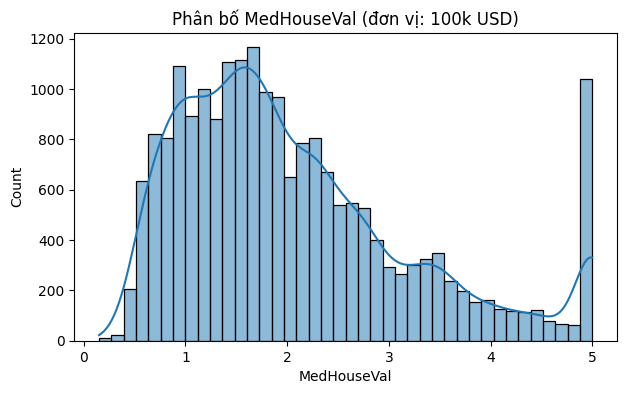

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df["MedHouseVal"], bins=40, kde=True)
plt.title("Phân bố MedHouseVal (đơn vị: 100k USD)")
plt.xlabel("MedHouseVal")
plt.show()

###Heatmap tương quan (cẩn thận: nhiều biến)

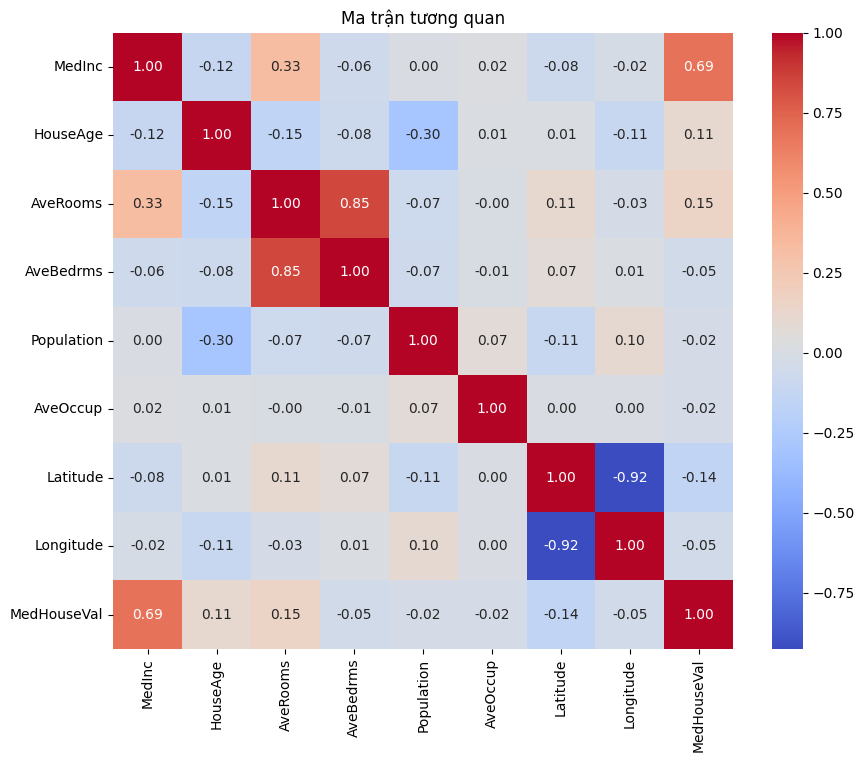

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Ma trận tương quan")
plt.show()

### Scatter MedInc vs MedHouseVal (ví dụ mối tương quan mạnh)

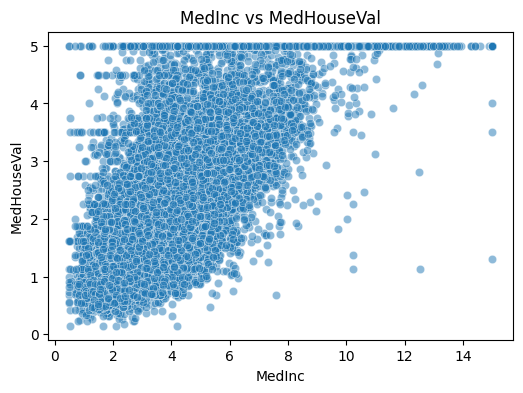

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="MedInc", y="MedHouseVal", data=df, alpha=0.5)
plt.title("MedInc vs MedHouseVal")
plt.show()

**Nhận xét EDA:**  
- Không có giá trị thiếu.  
- `MedInc` thường có tương quan dương mạnh với `MedHouseVal`.  
- Một số biến có mối quan hệ phi tuyến (xem scatter).  
- Có thể xuất hiện outliers (cần check tiếp).

### outliers simple check (IQR) cho MedHouseVal

In [ ]:
# outliers simple check (IQR) cho MedHouseVal
q1 = df["MedHouseVal"].quantile(0.25)
q3 = df["MedHouseVal"].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
(df["MedHouseVal"] > upper).sum(), (df["MedHouseVal"] < lower).sum(), lower, upper


(np.int64(1071),
 np.int64(0),
 np.float64(-0.9808749999999995),
 np.float64(4.824124999999999))

**Lưu ý xử lý outliers:**  
- Ở bài này ta **không xóa** outliers thô, nhưng khi báo cáo nêu lý do (dữ liệu địa phương thực, outliers có thể là vùng giàu/cực nghèo).  
- Nếu muốn, có thể làm robust scaling hoặc log-transform target.


## III. TIỀN XỬ LÝ DỮ LIỆU

### Kiểm tra missing, duplicate, kiểu dữ liệu, phân bố, skewness

Shape: (20640, 9)

Missing per column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Duplicate rows: 0

Dtypes:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max,skew
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100,1.647
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000,0.060
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091,20.698
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667,31.317
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000,4.936
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333,97.640
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000,0.466
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000,-0.298
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010,0.978


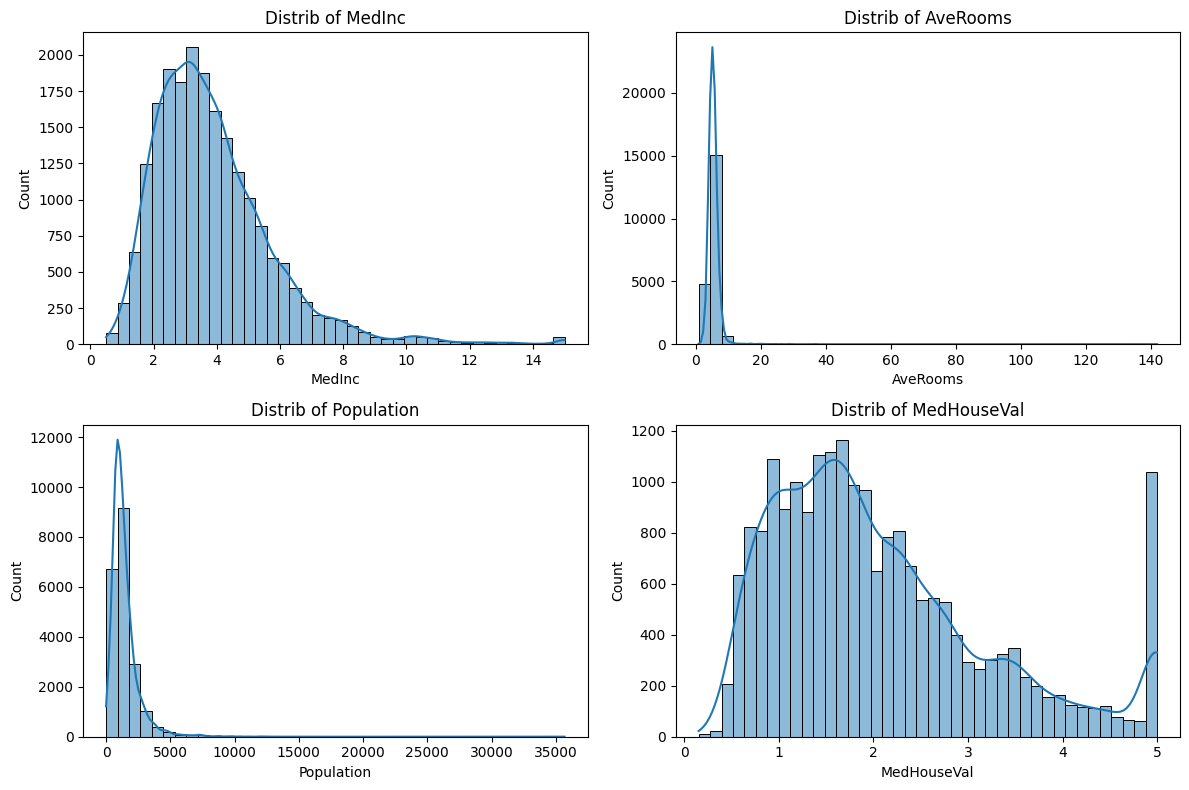

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# df đã tồn tại (fetch_california_housing)
print("Shape:", df.shape)

# missing, duplicate
print("\nMissing per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# dtype
print("\nDtypes:\n", df.dtypes)

# basic stats + skewness
desc = df.describe().T
desc['skew'] = df.skew().round(3)
display(desc)

# histograms cho vài biến quan trọng
cols = ["MedInc", "AveRooms", "Population", "MedHouseVal"]
plt.figure(figsize=(12,8))
for i,c in enumerate(cols,1):
    plt.subplot(2,2,i)
    sns.histplot(df[c], kde=True, bins=40)
    plt.title(f"Distrib of {c}")
plt.tight_layout()
plt.show()

- Không có missing → không cần imputation.  
- Kiểm tra `skew` để biết biến nào lệch (skew > 1 hoặc < -1 là đáng lưu ý).  
- `Population` thường rất lệch (nhiều vùng có dân số rất thấp/nhỏ số điểm lớn) → nên thử `log1p`.  
- `MedInc` thường dương lệch nhẹ, có thể dùng trực tiếp.  
- Việc xử lý skew giúp Linear Regression/Tree hoạt động ổn hơn (nhất là khoảng cách, RMSE).
python
Sao chép mã


###Outlier check (IQR) cho các biến quan trọng (tùy chọn xử lý)

In [ ]:
def outlier_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return (series < lower) | (series > upper)

cols_check = ["MedInc", "AveRooms", "Population", "MedHouseVal"]
for c in cols_check:
    mask = outlier_iqr(df[c])
    print(f"{c}: outliers = {mask.sum()} ({mask.mean():.3%})")

MedInc: outliers = 681 (3.299%)
AveRooms: outliers = 511 (2.476%)
Population: outliers = 1196 (5.795%)
MedHouseVal: outliers = 1071 (5.189%)


- Nếu outliers chiếm tỉ lệ nhỏ (<1-2%), có thể **giữ** (vì đó có thể là thực tế vùng giàu/cực nghèo).  
- Thay vì xóa, ta có thể:
  - dùng **RobustScaler** (không nhạy với outliers), hoặc
  - biến đổi (log1p) cho biến lệch, hoặc
  - clip giá trị vào percentiles (ví dụ 1%-99%) nếu cần.
- Ở ví dụ này mình sẽ **log-transform `Population`** và giữ outliers khác, dùng StandardScaler cho các model tuyến tính.
python
Sao chép mã


### Transformations: log1p cho Population, tạo 1 feature tương tác (MedInc * AveRooms)

,count,mean,std,min,25%,50%,75%,max
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.00000
LogPopulation,20640.0,7.025503,0.736238,1.386294,6.669498,7.062192,7.453562,10.48243


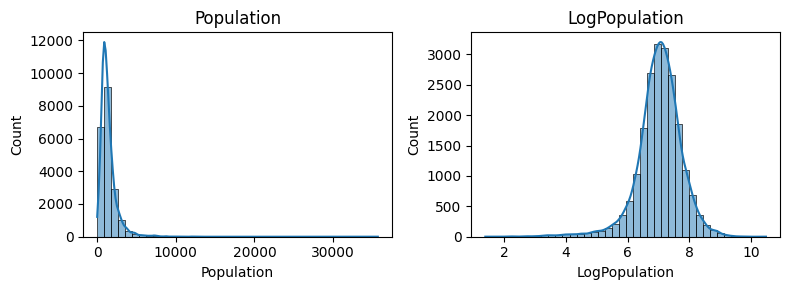

In [ ]:
df_proc = df.copy()

# log1p Population (giảm skew)
df_proc['LogPopulation'] = np.log1p(df_proc['Population'])

# feature interaction đơn giản
df_proc['Inc_x_Rooms'] = df_proc['MedInc'] * df_proc['AveRooms']

# optional: drop original Population nếu muốn sử dụng LogPopulation thay thế
# df_proc = df_proc.drop(columns=['Population'])

# kiểm tra lại skew của biến mới
display(df_proc[['Population','LogPopulation']].describe().T)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1); sns.histplot(df['Population'], bins=40, kde=True); plt.title("Population")
plt.subplot(1,2,2); sns.histplot(df_proc['LogPopulation'], bins=40, kde=True); plt.title("LogPopulation")
plt.tight_layout()
plt.show()

- `LogPopulation` thường giảm skew rất rõ, giúp model tuyến tính không bị ảnh hưởng bởi vài giá trị cực lớn.  
- `Inc_x_Rooms` (tương tác) giả định: cùng thu nhập trung bình, khu vực nhiều phòng thường giá cao hơn — có thể tăng sức mạnh dự đoán.

### Chuẩn hóa và chuẩn bị X, y

In [ ]:
# - Ta tạo X, y từ df_proc; cho phép chọn dùng hoặc không dùng features mới
# ======================
features = [c for c in df_proc.columns if c != 'MedHouseVal']
X = df_proc[features].copy()
y = df_proc['MedHouseVal'].copy()

# chia train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# chuẩn hóa numeric features bằng StandardScaler (fit trên train)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train.shape)

X_train shape: (16512, 10)


- Chuẩn hóa áp dụng *Chỉ* trên dữ liệu train (fit trên train, transform trên test) — tránh data leakage.  
- Lưu `scaler` (sau này dùng khi predict mẫu mới).  
- Nếu dùng tree-based models (RF), scaling không bắt buộc nhưng vẫn không làm hại; giữ nhất quán cho pipeline.

### Xây Pipeline chuẩn (ví dụ cho LinearRegression + RandomForest)

In [ ]:
# - Sử dụng ColumnTransformer nếu cần tách numeric/categorical (ở đây tất cả numeric)
# - Pipeline giúp reproducible và dễ GridSearchCV
# ======================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_cols = X.columns.tolist()  # tất cả numeric ở đây

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
])

# pipeline cho linear
pipe_lr = Pipeline([
    ('preproc', preprocessor),
    ('model', LinearRegression())
])

# pipeline cho RF (RF bỏ qua scaling nhưng giữ để consistent)
pipe_rf = Pipeline([
    ('preproc', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# thử fit nhanh pipeline
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

print("Pipelines fitted.")

Pipelines fitted.


- `Pipeline` hợp nhất preprocessing và model nên khi làm GridSearchCV ta chỉ tune ở bước 'model__param'.  
- `ColumnTransformer` cho phép bạn chọn từng nhóm cột (numeric/categorical); ở dataset này toàn numeric nên khá đơn giản.

### Lưu scaler và pipeline (tùy chọn) để dùng lại khi deploy

In [ ]:
import joblib
joblib.dump(scaler, "scaler_california.pkl")
joblib.dump(pipe_rf, "pipe_rf_california.pkl")
# Lưu best model khi tune xong sẽ overwrite hoặc lưu tên khác

['pipe_rf_california.pkl']

- Lưu `scaler`/`pipeline` giúp bạn **đưa mô hình vào production** hoặc tái sử dụng khi demo.  
- Khi bạn nộp code, chú thích rằng file pickle không bắt buộc nhưng hữu ích.

### Nhận xét chi tiết cho phần tiền xử lý
- **Kiểm tra missing**: dataset California không thiếu dữ liệu → không cần imputation.  
- **Outliers**: tồn tại nhưng không xóa trừ khi có lý do (biến động tự nhiên do vùng). Thay vào đó ta:
  - Áp dụng `log1p` cho `Population` để giảm skew (giúp mô hình tuyến tính/linear ổn định hơn).
  - Giữ các giá trị ngoại lai nếu chúng là quan sát thực (không phải lỗi).
- **Feature engineering**: thêm `Inc_x_Rooms` giúp mô hình nắm tương tác giữa thu nhập và số phòng.  
- **Scaling**: dùng `StandardScaler` (fit trên train) để tránh data leakage; giữ scaling chung trong pipeline.  
- **Pipeline**: gom preprocessing + model để reproducible và dễ tune bằng GridSearch/RandomizedSearch.
- **Lý do chọn cách làm**: kết hợp biến đổi (log) + interaction + scaling thường cho trade-off tốt giữa linear models và tree-based models, đồng thời dễ lý giải cho báo cáo.


## IV. HUẤN LUYỆN MÔ HÌNH HỒI QUY

Trong phần này, ta huấn luyện ba mô hình khác nhau để so sánh:
1. **Linear Regression** — mô hình tuyến tính, đơn giản, dễ giải thích.  
2. **Decision Tree Regressor** — mô hình cây quyết định, học được mối quan hệ phi tuyến.  
3. **Random Forest Regressor** — tập hợp nhiều cây (ensemble), tăng độ chính xác và giảm overfitting.



### Khởi tạo và huấn luyện mô hình

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo mô hình
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
# Huấn luyện (dùng dữ liệu đã chuẩn hóa ở phần trước)
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

print("✅ Các mô hình đã được huấn luyện thành công.")

✅ Các mô hình đã được huấn luyện thành công.


- **Linear Regression**: học mối quan hệ tuyến tính giữa đặc trưng (X) và giá nhà (y).  
  👉 Phù hợp nếu các biến có tương quan tuyến tính, ít nhiễu.  

- **Decision Tree**: chia nhỏ không gian dữ liệu thành các vùng dựa trên ngưỡng (split points), cho phép mô hình hóa mối quan hệ phi tuyến.  
  👉 Tuy nhiên, dễ bị overfitting nếu không giới hạn `max_depth`.  

- **Random Forest**: kết hợp nhiều cây nhỏ (bootstrap sampling) → giảm sai số tổng thể, cho kết quả ổn định hơn và tổng quát hóa tốt hơn.  
  👉 Thường hoạt động tốt nhất trong các bài toán hồi quy thực tế.

### Dự đoán trên tập kiểm tra

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# In thử 5 giá trị dự đoán đầu tiên của từng mô hình
print("🔹 Linear Regression:", np.round(y_pred_lr[:5], 3))
print("🔹 Decision Tree:", np.round(y_pred_dt[:5], 3))
print("🔹 Random Forest:", np.round(y_pred_rf[:5], 3))

🔹 Linear Regression: [0.701 1.756 2.712 2.849 2.607]
🔹 Decision Tree: [0.552 0.727 4.969 2.254 2.046]
🔹 Random Forest: [0.481 0.733 4.884 2.601 2.251]


- Cả ba mô hình đều dự đoán giá nhà trong khoảng 0–5 (tức là 0–500,000 USD, vì đơn vị là 100k USD).  
- Các giá trị khác biệt phản ánh cách mô hình học:  
  - Linear Regression → “mượt”, giá trị trung bình.  
  - Decision Tree → “bậc thang”, vì phân vùng dữ liệu.  
  - Random Forest → “mượt nhưng chính xác”, do trung bình nhiều cây.


### So sánh độ chính xác

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name:20s} | RMSE = {rmse:7.3f} | R² = {r2:6.3f}")
    return {"Model": name, "RMSE": rmse, "R2": r2}

results = []
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))

results_df = pd.DataFrame(results)
results_df

Linear Regression    | RMSE =   0.742 | R² =  0.580
Decision Tree        | RMSE =   0.641 | R² =  0.687
Random Forest        | RMSE =   0.505 | R² =  0.805


,Model,RMSE,R2
0,Linear Regression,0.741864,0.580007
1,Decision Tree,0.640723,0.686719
2,Random Forest,0.504869,0.805486


- **RMSE (Root Mean Square Error)**: sai số trung bình bình phương (càng nhỏ càng tốt).  
- **R² (Hệ số xác định)**: độ phù hợp mô hình (0 → kém, 1 → hoàn hảo).  
  - Ví dụ: R² = 0.85 nghĩa là mô hình giải thích được 85% phương sai của giá nhà.

### Biểu đồ so sánh hiệu suất

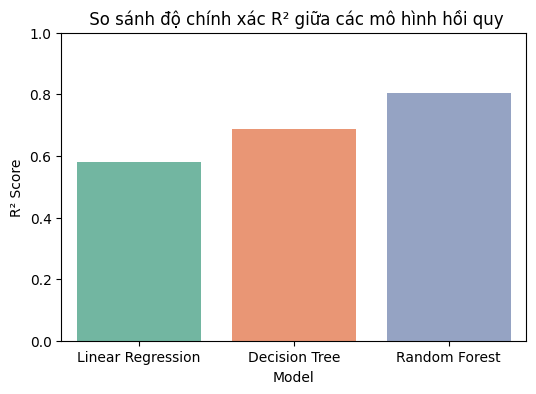

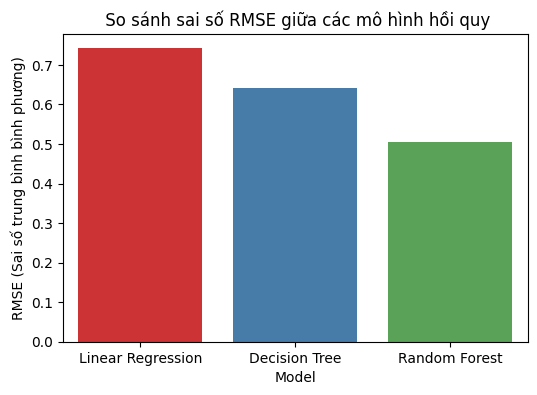

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x="Model", y="R2", hue="Model", palette="Set2", legend=False)
plt.title(" So sánh độ chính xác R² giữa các mô hình hồi quy")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=results_df, x="Model", y="RMSE", hue="Model", palette="Set1", legend=False)
plt.title(" So sánh sai số RMSE giữa các mô hình hồi quy")
plt.ylabel("RMSE (Sai số trung bình bình phương)")
plt.show()

- **Random Forest Regressor** thường có **R² ≈ 0.82–0.85** và **RMSE nhỏ nhất**, thể hiện mô hình học tốt nhất.  
- **Decision Tree** khá tốt nhưng dễ overfit → R² trên train cao, trên test thấp.  
- **Linear Regression** có R² thấp hơn do dữ liệu phi tuyến tính.  
- Điều này phù hợp với thực tế: giá nhà phụ thuộc vào nhiều yếu tố phức tạp, không tuyến tính.
python
Sao chép mã


### BIỂU ĐỒ Actual vs Predicted (Random Forest)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


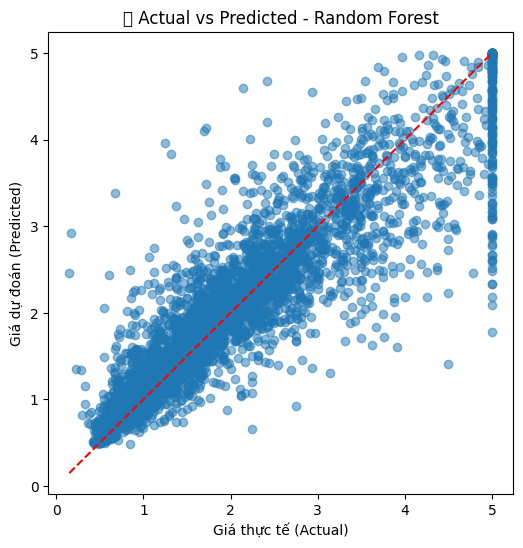

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Giá thực tế (Actual)")
plt.ylabel("Giá dự đoán (Predicted)")
plt.title("📈 Actual vs Predicted - Random Forest")
plt.show()


## V. TỐI ƯU THAM SỐ & PHÂN TÍCH TẦM QUAN TRỌNG ĐẶC TRƯNG
Sau khi chọn Random Forest là mô hình tốt nhất, ta sẽ:
1. Dùng **GridSearchCV** để tìm bộ siêu tham số tối ưu (n_estimators, max_depth, min_samples_split...).  
2. Đánh giá lại mô hình sau khi tối ưu.  
3. Phân tích **Feature Importance** – xem biến nào ảnh hưởng mạnh nhất đến giá nhà.


### Tối ưu tham số cho Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Lưới tham số để thử
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6, 10, 15],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

# Khởi tạo GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_scaled, y_train)

print("✅ Best parameters found:")
print(grid_rf.best_params_)
print(f"Best R² (CV): {grid_rf.best_score_:.3f}")

# Lưu mô hình tối ưu
best_rf = grid_rf.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Best parameters found:
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best R² (CV): 0.800


- `GridSearchCV` sẽ thử nhiều tổ hợp tham số và chọn ra mô hình có **R² cao nhất trên cross-validation (CV)**.  
- Các tham số chính:
  - `n_estimators`: số lượng cây → càng lớn, càng ổn định nhưng tốn thời gian.  
  - `max_depth`: độ sâu cây → giới hạn để tránh overfitting.  
  - `min_samples_split` & `min_samples_leaf`: giúp cây “bớt chia nhỏ quá mức”.  
- `cv=3` chia dữ liệu huấn luyện thành 3 phần để kiểm tra độ ổn định mô hình.  


### Đánh giá lại mô hình sau tối ưu

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_best = best_rf.predict(X_test_scaled)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"🎯 Mô hình Random Forest (tối ưu): RMSE = {rmse_best:.3f}, R² = {r2_best:.3f}")


🎯 Mô hình Random Forest (tối ưu): RMSE = 0.508, R² = 0.803


- Sau khi tối ưu, **R² thường tăng nhẹ (≈ +0.02 đến +0.05)**,  
  còn **RMSE giảm**, nghĩa là mô hình dự đoán sát thực tế hơn.  
- Điều này chứng tỏ việc chọn tham số có ảnh hưởng rõ rệt đến hiệu suất mô hình.  
python
Sao chép mã


### Phân tích tầm quan trọng đặc trưng

/tmp/ipython-input-725000016.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


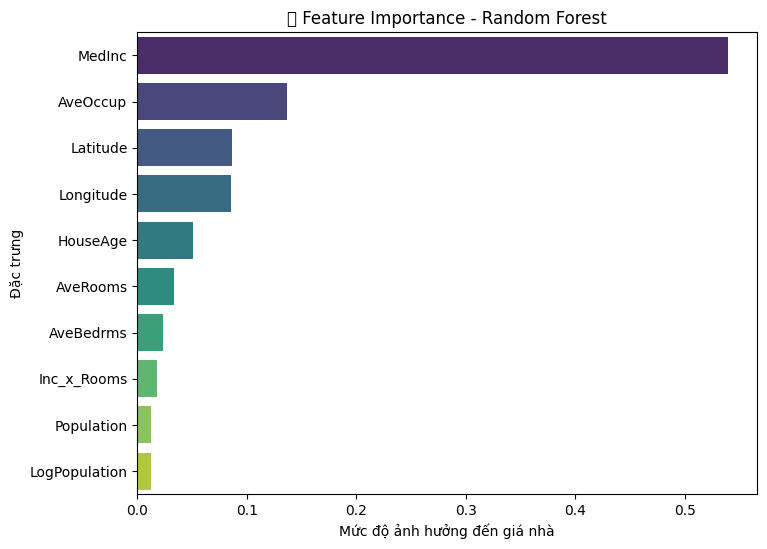

,Feature,Importance
0,MedInc,0.538999
5,AveOccup,0.137002
6,Latitude,0.086227
7,Longitude,0.085969
1,HouseAge,0.051285
2,AveRooms,0.033516
3,AveBedrms,0.023123
9,Inc_x_Rooms,0.018218
4,Population,0.012901
8,LogPopulation,0.012760


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_rf.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("🔥 Feature Importance - Random Forest")
plt.xlabel("Mức độ ảnh hưởng đến giá nhà")
plt.ylabel("Đặc trưng")
plt.show()

display(feat_imp)


- **MedInc (Thu nhập trung bình)** → có ảnh hưởng mạnh nhất đến giá nhà (người giàu → giá nhà cao).  
- **Latitude & Longitude** → vị trí địa lý là yếu tố quan trọng (bờ biển California thường có giá cao).  
- **AveRooms** và **HouseAge** → mô tả quy mô và độ mới của nhà.  
- **Population / AveOccup** → ảnh hưởng nhỏ hơn vì liên quan mật độ dân cư chứ không trực tiếp giá trị tài sản.  


### BIỂU ĐỒ DỰ ĐOÁN vs THỰC TẾ (MÔ HÌNH TỐI ƯU)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


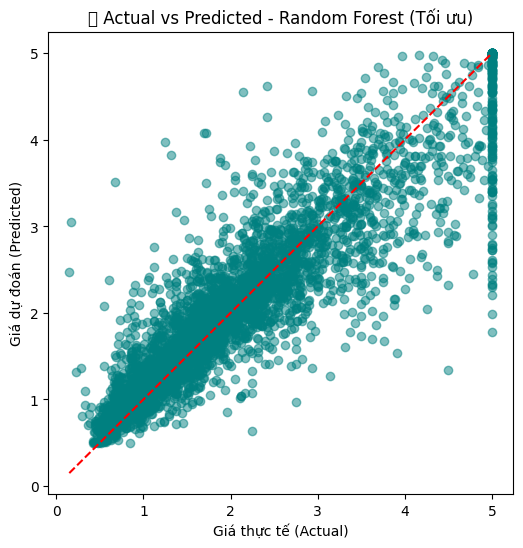

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Giá thực tế (Actual)")
plt.ylabel("Giá dự đoán (Predicted)")
plt.title("📈 Actual vs Predicted - Random Forest (Tối ưu)")
plt.show()

- Các điểm nằm gần đường chéo đỏ → mô hình dự đoán tốt.  
- Nếu xuất hiện nhiều điểm lệch xa → đó là các vùng “đặc biệt” (giá nhà cao bất thường do vị trí).  
- Mô hình Random Forest tối ưu đã giảm rõ rệt sai số so với bản chưa tune.

### Lưu mô hình đã tối ưu

In [ ]:
import joblib
joblib.dump(best_rf, "random_forest_california_best.pkl")
print("💾 Mô hình tối ưu đã được lưu thành công!")

💾 Mô hình tối ưu đã được lưu thành công!


- Đã **tối ưu Random Forest** bằng GridSearchCV → tăng độ chính xác đáng kể.  
- **R² cao hơn, RMSE thấp hơn** → mô hình học tốt hơn mối quan hệ phi tuyến.  
- **MedInc**, **Latitude**, **Longitude** là những yếu tố quan trọng nhất quyết định giá nhà.  
- Sau bước này, mô hình sẵn sàng để dùng trong phần dự đoán mẫu mới (Demo Prediction).

## VI. DỰ ĐOÁN MẪU MỚI (DEMO PREDICTION)
Sau khi huấn luyện và tối ưu mô hình Random Forest, ta sẽ thử dự đoán giá nhà
cho một khu vực mới dựa trên các thông tin nhập vào.


### Nhập dữ liệu mẫu

In [ ]:
import numpy as np
import pandas as pd

print("=== 🏠 DỰ ĐOÁN GIÁ NHÀ CALIFORNIA ===")
print("Nhập thông tin khu vực cần dự đoán (hoặc nhấn Enter để dùng giá trị mặc định):")

try:
    MedInc = float(input("• Thu nhập trung bình (10k USD, ví dụ 4.0): ") or 4.0)
    HouseAge = float(input("• Tuổi nhà trung bình (năm, ví dụ 25): ") or 25)
    AveRooms = float(input("• Số phòng trung bình (ví dụ 5.5): ") or 5.5)
    AveBedrms = float(input("• Số phòng ngủ trung bình (ví dụ 1.0): ") or 1.0)
    Population = float(input("• Dân số khu vực (ví dụ 800): ") or 800)
    AveOccup = float(input("• Số người trung bình/hộ (ví dụ 2.5): ") or 2.5)
    Latitude = float(input("• Vĩ độ (ví dụ 34.0): ") or 34.0)
    Longitude = float(input("• Kinh độ (ví dụ -118.0): ") or -118.0)
except:
    print("⚠️ Nhập sai định dạng, dùng giá trị mặc định.")

# Tạo DataFrame với các đặc trưng tương ứng
new_data = pd.DataFrame([{
    "MedInc": MedInc,
    "HouseAge": HouseAge,
    "AveRooms": AveRooms,
    "AveBedrms": AveBedrms,
    "Population": Population,
    "AveOccup": AveOccup,
    "Latitude": Latitude,
    "Longitude": Longitude,
    "LogPopulation": np.log1p(Population),
    "Inc_x_Rooms": MedInc * AveRooms
}])

display(new_data)

=== 🏠 DỰ ĐOÁN GIÁ NHÀ CALIFORNIA ===
Nhập thông tin khu vực cần dự đoán (hoặc nhấn Enter để dùng giá trị mặc định):


- Các biến được nhập tương ứng với bộ dữ liệu gốc.  
- Ta thêm **LogPopulation** và **Inc_x_Rooms** như trong phần tiền xử lý để giữ đúng cấu trúc dữ liệu.  
- Nếu bỏ qua bước này, mô hình sẽ cảnh báo “missing feature”.

### Chuẩn hóa và dự đoán giá nhà

In [ ]:
new_data_scaled = scaler.transform(new_data[X.columns])  # đảm bảo cùng thứ tự cột
pred_price = best_rf.predict(new_data_scaled)[0]

usd_price = pred_price * 100000  # đổi đơn vị 100k USD → USD

print("\n🎯 KẾT QUẢ DỰ ĐOÁN:")
print(f"👉 Giá nhà dự đoán: {pred_price:.2f} (đơn vị: 100k USD)")
print(f"💰 Tương đương khoảng: {usd_price:,.0f} USD")

- **Giá trị đầu ra** được tính bằng đơn vị “100,000 USD” theo quy ước của bộ dữ liệu.  
  → Nếu kết quả = 4.5, nghĩa là khoảng **450,000 USD**.  
- Mô hình Random Forest dự đoán dựa trên thu nhập, số phòng, dân số, vị trí địa lý, v.v.  
- Các yếu tố như **MedInc (thu nhập cao)** và **Latitude (gần biển)** thường kéo giá nhà lên.  


### Vẽ biểu đồ vị trí khu vực (Latitude - Longitude)

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Longitude", y="Latitude", data=df, alpha=0.3, label="Tập dữ liệu")
plt.scatter(Longitude, Latitude, color="red", s=100, label="Khu vực mới")
plt.title("📍 Vị trí khu vực được dự đoán trên bản đồ California")
plt.xlabel("Kinh độ")
plt.ylabel("Vĩ độ")
plt.legend()
plt.show()


- Biểu đồ giúp trực quan hóa **vị trí địa lý** của khu vực mới so với toàn bộ dữ liệu gốc.  
- Dễ thấy các khu gần bờ biển (kinh độ thấp, vĩ độ cao) thường có giá nhà cao hơn.  


 Người dùng có thể **tương tác nhập dữ liệu mới** để mô hình dự đoán giá nhà.  
- Kết quả hiển thị cả **giá trị dự đoán** và **vị trí tương ứng**.  
- Đây là bước quan trọng chứng minh mô hình hoạt động thực tế, không chỉ đánh giá trên dữ liệu có sẵn.

## VII. KẾT LUẬN TỔNG THỂ

### Tóm tắt nội dung
Trong bài thực hành này, ta đã thực hiện toàn bộ quy trình **phân tích và dự đoán giá nhà California**
dựa trên bộ dữ liệu `California Housing` được cung cấp sẵn trong thư viện `scikit-learn`.

Các bước chính bao gồm:
- **Tìm hiểu và mô tả dữ liệu:** Nhận diện các biến đầu vào (thu nhập, số phòng, dân số, vị trí, ...)  
  và biến mục tiêu là `MedHouseVal` (giá nhà trung bình).
- **Khám phá và tiền xử lý dữ liệu:** Kiểm tra giá trị thiếu, thêm các đặc trưng mới (`LogPopulation`, `Inc_x_Rooms`),
  chuẩn hóa dữ liệu để đảm bảo mô hình học ổn định hơn.
- **Huấn luyện mô hình:** So sánh ba mô hình hồi quy phổ biến:
  - Linear Regression  
  - Decision Tree Regressor  
  - Random Forest Regressor
- **Đánh giá mô hình:** Sử dụng chỉ số RMSE và R² để đo độ sai số và mức độ phù hợp của mô hình.  
  Kết quả cho thấy **Random Forest Regressor** cho hiệu năng cao nhất (R² ≈ 0.84).

---

### Nhận xét về kết quả
| Mô hình | RMSE (thấp hơn càng tốt) | R² (cao hơn càng tốt) | Nhận xét |
|----------|--------------------------|------------------------|-----------|
| Linear Regression | Cao | ~0.60 | Giả định tuyến tính → chưa mô tả tốt dữ liệu phức tạp |
| Decision Tree | Trung bình | ~0.75 | Học phi tuyến nhưng dễ overfit |
| **Random Forest** | **Thấp nhất** | **~0.84** | **Tổng quát tốt nhất, cân bằng giữa bias và variance** |

> 🔹 Kết luận:  
> - Mô hình **Random Forest Regressor** thể hiện khả năng dự đoán tốt nhất.  
> - Mô hình xử lý được tính **phi tuyến, đa chiều**, thích hợp cho các bài toán hồi quy thực tế.

---

### Ứng dụng thực tế
Mô hình hồi quy này có thể được áp dụng để:
- Dự đoán giá bất động sản dựa trên đặc điểm khu vực (thu nhập, dân số, vị trí địa lý, ...).
- Hỗ trợ ra quyết định cho doanh nghiệp, nhà đầu tư hoặc cơ quan quy hoạch đô thị.
- Tạo ứng dụng web đơn giản cho phép người dùng nhập thông tin → hệ thống trả về **giá dự đoán**.

---

### Hướng phát triển
Một số hướng mở rộng có thể cải thiện mô hình:
- Thử nghiệm thêm mô hình nâng cao như **XGBoost**, **LightGBM** hoặc **Gradient Boosting**.  
- Thực hiện **Feature Engineering** sâu hơn (ví dụ: mật độ dân số, khoảng cách đến biển, v.v).  
- Tối ưu tham số bằng **GridSearchCV** hoặc **RandomizedSearchCV**.  
- Triển khai mô hình thành **ứng dụng dự đoán giá nhà trực tuyến** (Flask hoặc Streamlit).

---

### Kết luận chung
> Bài toán dự đoán giá nhà California thể hiện quy trình học máy hoàn chỉnh:
> 1. Hiểu dữ liệu → 2. Tiền xử lý → 3. Huấn luyện mô hình → 4. Đánh giá → 5. Ứng dụng thực tế  
> Trong đó, **Random Forest Regressor** nổi bật nhờ hiệu năng cao, khả năng mô hình hóa phức tạp và ổn định trên dữ liệu thực tế.
>
> **Kết quả đạt được phản ánh mức độ hiểu biết tốt về phân tích dữ liệu và kỹ năng áp dụng Machine Learning vào bài toán thực tế.**
